- CIFAR-10 veri kümesinin sınıfları şunlardır:
    0- Airplanes
    1- Cars 
    2- Birds
    3- Cats
    4- Deer
    5- Dogs
    6- Frogs
    7- Horses
    8- Ships
    9- Trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

 VISUALIZE DATA:

[0]


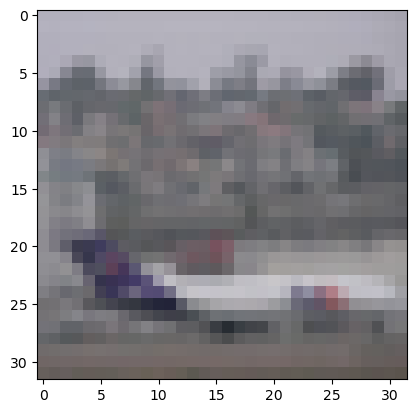

In [7]:
i = 30000
plt.imshow(x_train[i])
print(y_train[i])

/Users/ayhancagan/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


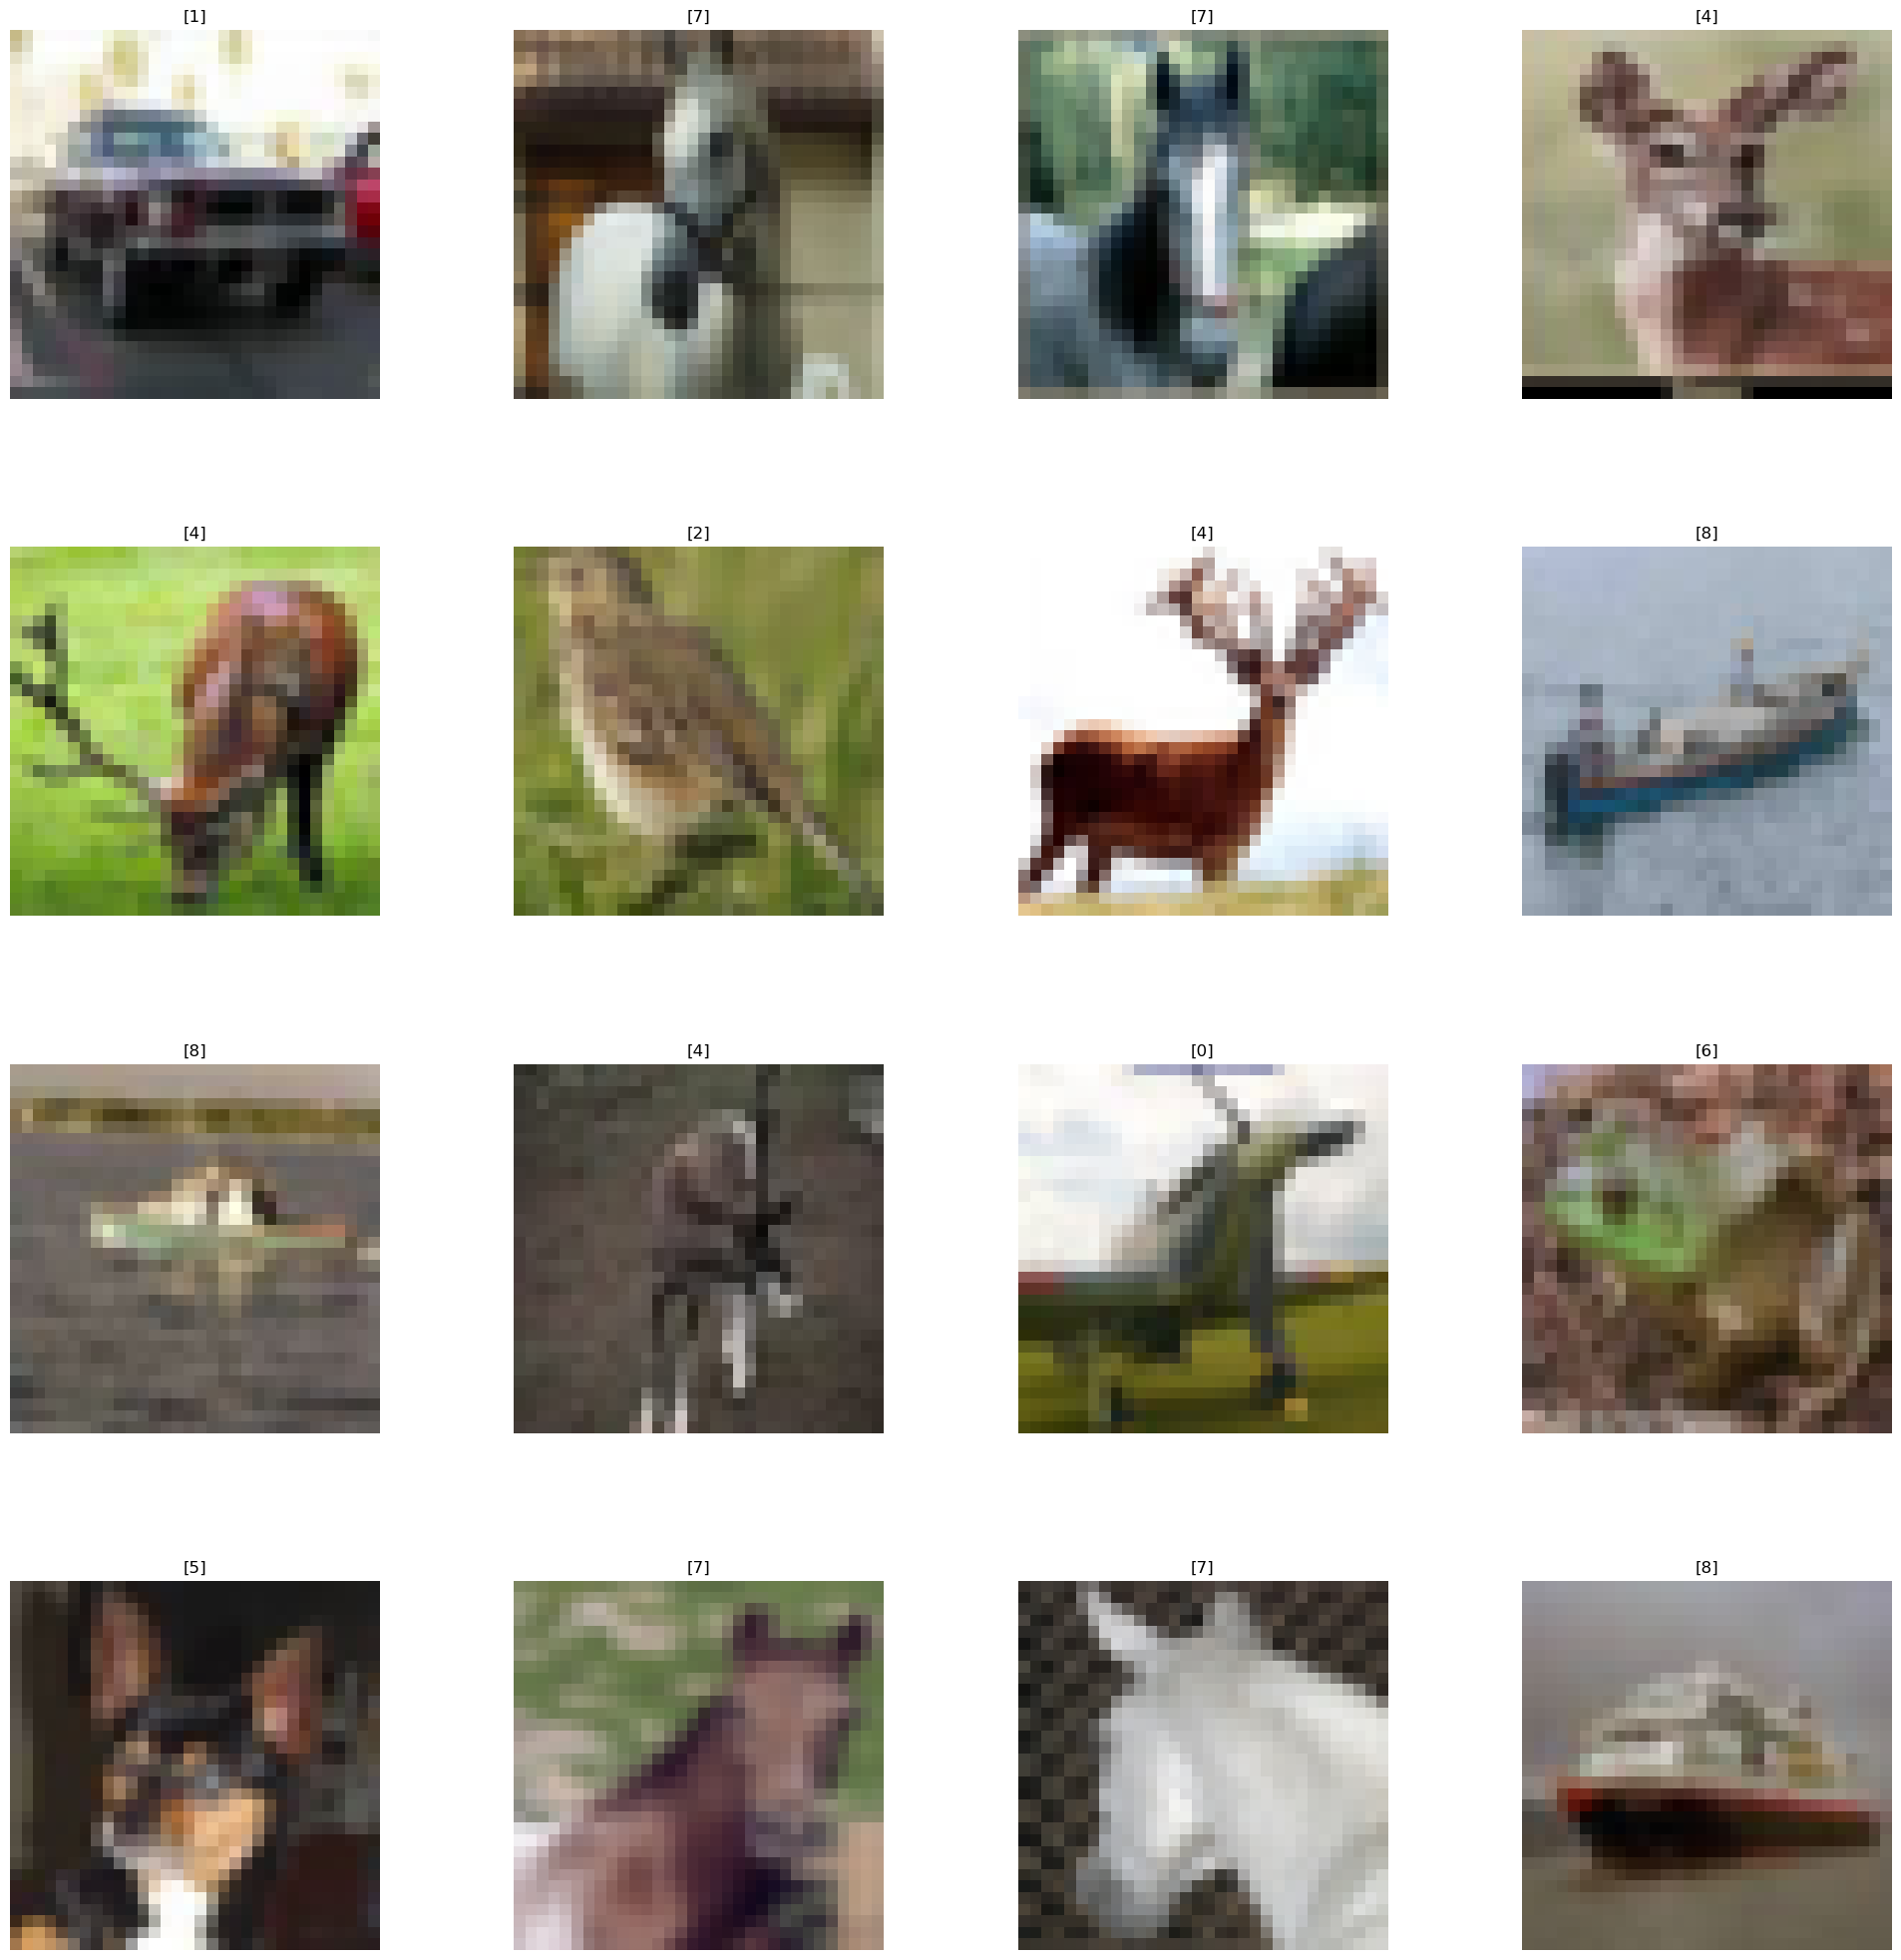

In [8]:
W_grid = 4
L_grid = 4 

fig, axes = plt.subplots(L_grid, W_grid ,figsize =(25,25))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)# Rastgale sayılar atar.
    axes[i].imshow(x_train[index]) #resimlerin hangi sınıfta olduğunu yazar.
    axes[i].set_title(y_train[index])
    axes[i].axis('off') # x ve y eksenlerini siler sadece fotorafları kalır.

plt.subplots_adjust(hspace= 0.4) #dikey boşlukları ayarlar. 0.4 genellikle iyi bir görsel sağlar.

In [9]:
n_training

50000

DATA PREPARATION:

In [10]:
x_train = x_train.astype('float32') # Float 32 ye cevirmek Matematiksel işlemleri kolaylaştırır.
x_test = x_test.astype('float32')

In [11]:
number_cat = 10 # Kaç tane katagori olduğunu giriyoruz.

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat) # Burada (one hot) dediğimiz 0 ile 1 rakamlara ceviriyoruz.

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
x_train = x_train/255
x_test = x_test/255
#Bir veri setinin piksel değerleri 0 ile 255 arasındadır o yüzden 255 e böldük

In [18]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [20]:
x_train.shape #??

(50000, 32, 32, 3)

In [21]:
Input_shape = x_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

TRAİN THE MODEL:

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Conv2D: Convolutional (Evrişim) Katmanı, özellik haritalarını öğrenmek için kullanılır. Görüntü işleme görevlerinde genellikle kullanılır ve girdi üzerinde bir dizi filtre uygular.

MaxPooling2D ve AveragePooling2D: Pooling Katmanları, görüntü boyutunu küçültmek ve özelliklerin önemli özelliklerini vurgulamak için kullanılır. MaxPooling maksimum değeri seçerken, AveragePooling ortalama değeri seçer.

Dense: Tam bağlantılı katman (Fully Connected Layer), sinir ağıdaki her bir nöronun önceki katmandaki her nöronla bağlantılı olduğu bir katmandır. Genellikle sınıflandırma veya regresyon görevleri için kullanılır.

Flatten: Düzleştirme katmanı, verileri tek boyutlu bir vektöre dönüştürmek için kullanılır. Özellikle evrişimli sinir ağlarından (CNN) tam bağlantılı katmanlara (Dense) veriyi iletmek için kullanılır.

Dropout: Dropout, aşırı uydurmayı (overfitting) azaltmak için kullanılan bir tekniktir. Eğitim sırasında rastgele bir yüzde oranındaki nöronları devre dışı bırakarak ağın daha genelleme yapmasına yardımcı olur.

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu' ,input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [26]:
history = cnn_model.fit(x_train,y_train,batch_size=32, epochs =1,shuffle=True)

1563/1563 [==============================] - 88s 56ms/step - loss: 1.6186 - accuracy: 0.4136


 EVALUATE THE MODEL:

In [27]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 16ms/step - loss: 1.1870 - accuracy: 0.5728
Test Accuracy: 0.5727999806404114


In [40]:
import numpy as np

# Örnek tahmin sonuçları (predict) burada verilmiştir
predict = cnn_model.predict(x_test)

# Tahmin sonuçlarından sınıf indekslerini bulun
predicted = np.argmax(predict, axis=1)

# Tahmin edilen sınıf indekslerini görüntüleyin
print(predicted)

313/313 [==============================] - 5s 15ms/step
[3 8 8 ... 5 4 7]


In [41]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [43]:
y_test = y_test.argmax(1)

In [44]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

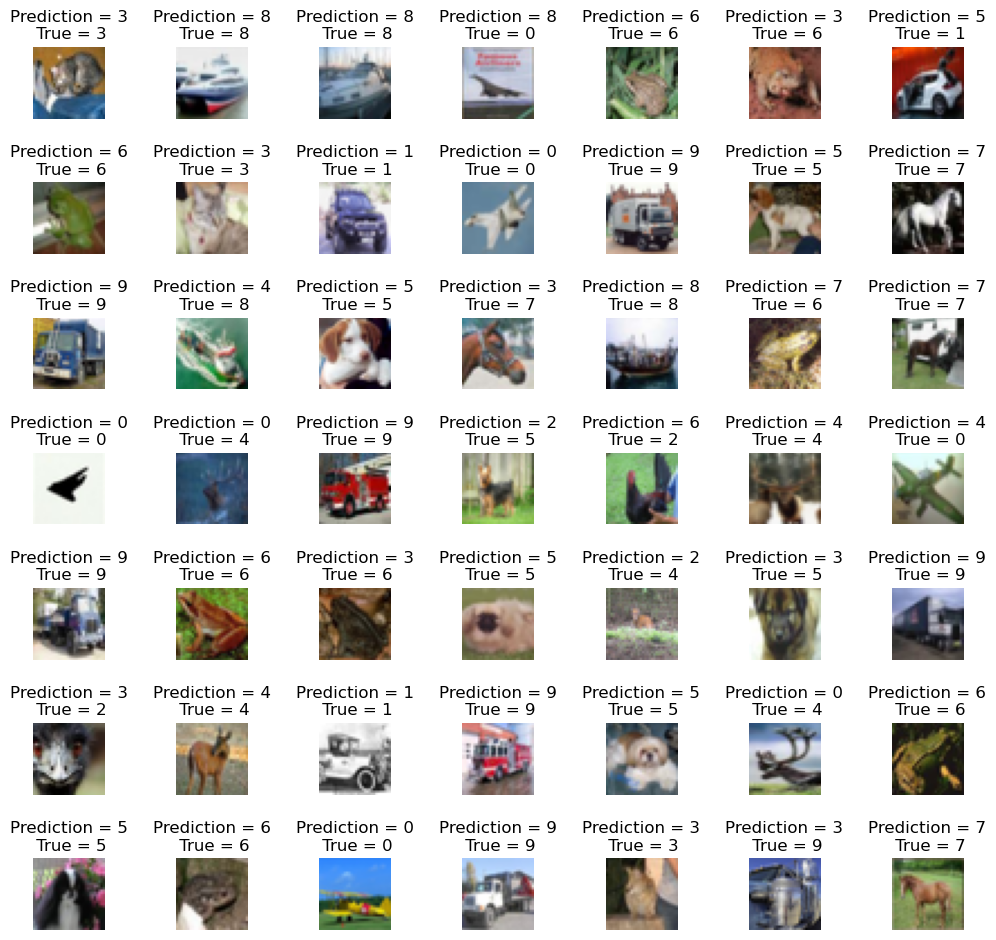

In [45]:
L = 7  
W = 7  

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()  # Alt çizimlerin düz bir liste haline getirilmesi

# 0'dan L*W'ye kadar (7x7=49) sayılarla bir döngü oluşturulur
for i in np.arange(0, L*W):
    # Her alt çizimde X_test içindeki bir görüntü gösterilir
    axes[i].imshow(x_test[i])
    
    # Görüntünün başlığı, tahmin sınıfını (predicted_classes) ve gerçek sınıfını (y_test) gösterir
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    
    # Eksenlerin görünürlüğü kapatılır
    axes[i].axis('off')

# Alt çizimler arasında bir boşluk bırakmak için wspace parametresi ayarlanır
plt.subplots_adjust(wspace=1)
plt.show()
 

<Axes: >

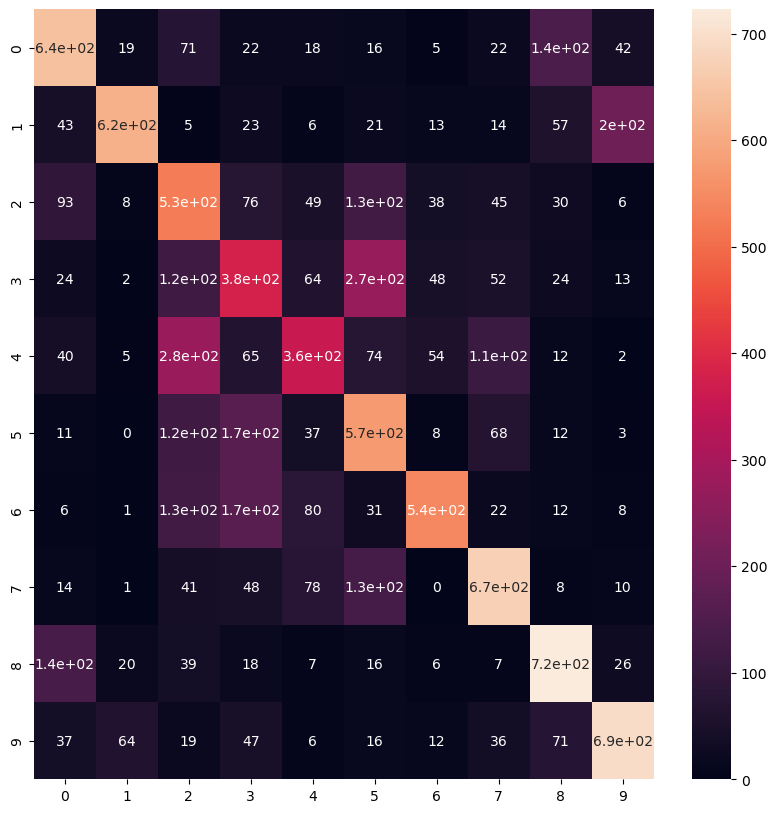

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

SAVING THE MODEL:

In [47]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/Users/ayhancagan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


IMPROVING THE MODEL WITH DATA AUGMENTATION:

DATA AUGMENTATION FOR THE CIFAR-10 DATASET:

- Görüntü Büyütme, orijinal görüntüleri çevirerek, büyüterek, döndürerek veri kümelerindeki görüntülerin varyasyonlarını yapay olarak artırma işlemidir.
- Büyütmeler ayrıca görüntülerin parlaklığını değiştirmeyi ve değiştirmeyi de içerir.

In [48]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [51]:
x_train.shape

(50000, 32, 32, 3)

In [52]:
n = 8
x_train_sample = x_train[:n]

In [53]:
x_train_sample.shape

(8, 32, 32, 3)

In [54]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(x_train_sample)

rotation_range = 90: Görüntüleri rastgele 0 ile 90 derece arasında döndürmek için kullanılır. Bu, örneğin, nesnelerin farklı açılardan görünümünü modelin öğrenmesine yardımcı olabilir.

vertical_flip = True: Görüntüleri dikey eksende rastgele çevirmek için kullanılır. Bu, örneğin, aynadaki bir nesnenin yansımasını öğrenmek için kullanışlı olabilir.

height_shift_range = 0.5: Görüntülerin yükseklik (dikey konum) değişikliğini rastgele yapmak için kullanılır. Burada, görüntünün yarısı kadar yükseklik değişimi yapılabilir.

brightness_range = (1, 3): Görüntülerin parlaklığını rastgele 1 ile 3 arasında değiştirmek için kullanılır. Bu, görüntülerin aydınlatma koşullarını simüle etmek için kullanışlı olabilir.

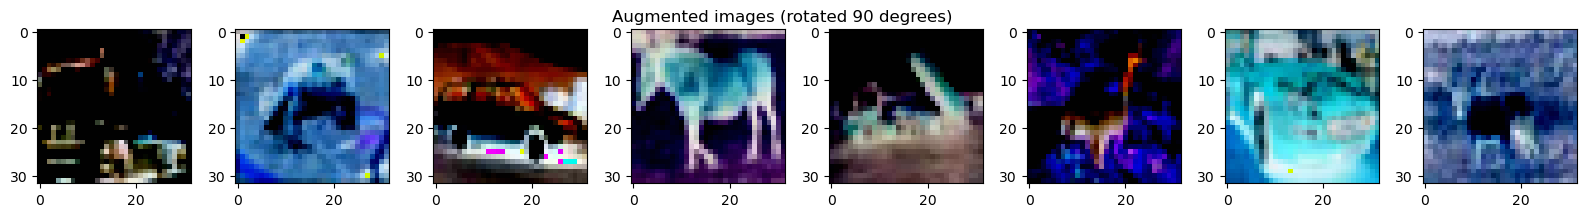

In [55]:
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(x_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)

        # NumPy dizisini bir Pillow görüntüsüne dönüştürün
        img = Image.fromarray((x_batch[i] * 255).astype('uint8'))

        ax.imshow(img)
    
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break




MODEL TRAINING USING AUGEMENTED DATASET:

In [56]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

width_shift_range = 0.1: Bu parametre, görüntülerin yatay (genişlik) yönde kaydırma miktarını belirler. width_shift_range değeri 0.1 olarak ayarlandığında, her bir görüntü, genişlik boyunca rastgele 0 ila 10% arasında kaydırılabilir. Bu, nesnelerin yatay konumlarının değişmesini simüle eder.

horizontal_flip = True: Bu parametre, görüntüleri yatay eksende rastgele çevirme işlemini etkinleştirir. Yani, bazı görüntüler rastgele yatay olarak yansıtılır. Bu, örneğin nesnelerin farklı yönlerde görünmesini simüle eder.


In [57]:
datagen.fit(x_train)

In [58]:
cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


/var/folders/fv/91mb69d55z99knlmqnj27vcr0000gn/T/ipykernel_78386/1145699921.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 85s 54ms/step - loss: 42020735168110657536.0000 - accuracy: 0.0848
Epoch 2/2
1563/1563 [==============================] - 368s 235ms/step - loss: 7212422479441488248832.0000 - accuracy: 0.0000e+00


In [ ]:
score = cnn_model.evaluate(x_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)